# Метод SQP (последовательного квадратичного программирования). Теория

## 1. Постановка задачи оптимизации

Рассмотрим задачу минимизации функции $n$ аргументов $f(x)$:
$$\min_{x\in \mathbb{R}^n}f(x)$$
при $m$ заданных ограничениях:
$$g(x)=0$$
где 

$$f: \mathbb{R}^n \rightarrow \mathbb{R}$$

$$g: \mathbb{R}^n \rightarrow \mathbb{R}^m$$

Задачу можно свести к поиску условного экстремума методом множителей Лагранжа.
Функцию Лагранжа можно записать в виде:

$$L(x,\lambda)=f(x)+\lambda g(x)$$

где $\lambda$ - вектор размерности $m$, составленный из множителей Лагранжа $\lambda_i$ для каждой из ограничивающих функций $g_i$ $(i\in 1...m)$:
$$\lambda=\begin{Bmatrix}
\lambda_1\\
\lambda_2\\
\cdots\\
\lambda_i\\
\cdots\\
\lambda_m
\end{Bmatrix}$$

Таким образом, можно записать следующее необходимое условие для минимума исходной функции:
$$\nabla L(x,\lambda)=0$$

Значит, для решения задачи необходимо решить данное уравнение - для этого используется итерационный поиск корней методом Ньютона.

Но для применения метода Ньютона необходимо аппроксимировать функцию Лагранжа и ограничивающую функцию. 

## 2. Аппроксимация функций

### 2.1. Аппроксимация функции Лагранжа

Зафиксируем точку $(x, \lambda)$ и сделаем шаг $s$ по координате:
$$L(x+s, \lambda)$$

Разложим это выражение выражение в ряд Тейлора с точностью до квдратичного члена и запишем полученную функцию от $s$ как $p(s)$:
$$L(x+s, \lambda) \approx L(x,\lambda) + s^T \nabla L(x,\lambda) + \frac{1}{2} s^T \nabla^2 L(x, \lambda) s = p(s)$$

Здесь $\nabla L(x,\lambda)$ - градиент функции Лагранжа. Его можно записать:

$$\nabla L(x,\lambda) = \begin{Bmatrix}
\frac{\partial{L}}{\partial{x}}\\
\frac{\partial{L}}{\partial{\lambda}}
\end{Bmatrix} = 
\begin{Bmatrix}
\nabla f(x) + \sum_{i=1}^m{\lambda_i \nabla g_i(x)}\\
g(x)
\end{Bmatrix}$$ 

Выражение $\nabla^2 L(x, \lambda)$ можно записать в следующем виде:
$$\nabla^2 L(x, \lambda)=\nabla (\nabla L(x, \lambda))=
\begin{pmatrix}
\frac{\partial^2 L}{\partial x^2} & \frac{\partial^2 L}{\partial x \partial \lambda}\\
\frac{\partial^2 L}{\partial \lambda \partial x} & \frac{\partial^2 L}{\partial \lambda^2}
\end{pmatrix}$$

Распишем каждый элемент этой матрицы подробнее.

#### 1. Левый верхний элемент
Обозначим левый верхний элемент как $B(x)$:

$$\frac{\partial^2 L}{\partial x^2}=\frac{\partial}{\partial x}\left( \nabla f(x) + \sum_{i=1}^m{\lambda_i \nabla g_i(x)} \right)
= H_f(x) + \sum_{i=1}^m{\lambda_i H_{g_i}(x)}$$

Здесь $H_k$ - это матрица Гессе для произвольной функции $k(x)$. Её можно записать в виде:

$$H_k=\begin{pmatrix}
\frac{\partial^2 k}{\partial x_1^2} & \frac{\partial^2 k}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 k}{\partial x_1 \partial x_j} & \cdots & \frac{\partial^2 k}{\partial x_1 \partial x_n}\\
\frac{\partial^2 k}{\partial x_2 \partial x_1} & \frac{\partial^2 k}{\partial x_2^2} & \cdots & \frac{\partial^2 k}{\partial x_2 \partial x_j} & \cdots & \frac{\partial^2 k}{\partial x_2 \partial x_n}\\
\cdots & \cdots & \cdots & \cdots & \cdots & \cdots\\
\frac{\partial^2 k}{\partial x_i \partial x_1} & \frac{\partial^2 k}{\partial x_i \partial x_2} & \cdots & \frac{\partial^2 k}{\partial x_i^2} & \cdots & \frac{\partial^2 k}{\partial x_i \partial x_n}\\
\cdots & \cdots & \cdots & \cdots & \cdots & \cdots\\
\frac{\partial^2 k}{\partial x_n \partial x_1} & \frac{\partial^2 k}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 k}{\partial x_n \partial x_j} & \cdots & \frac{\partial^2 k}{\partial x_n^2}
\end{pmatrix}$$

#### 2. Внедиагональные элементы

$$\frac{\partial^2 L}{\partial x \partial \lambda}=\frac{\partial}{\partial \lambda}\left( \nabla f(x) + \sum_{i=1}^m{\lambda_i \nabla g_i(x)} \right)=J_g^T(x)$$

$$\frac{\partial^2 L}{\partial \lambda \partial x}=\frac{\partial}{\partial x}\left( g(x)\right)=J_g(x)$$

Здесь $J_g$ - матрица Якоби векторной функции нескольких переменных $g$. Она записывается в следующем виде:
$$J_g=\begin{pmatrix}
\frac{\partial g_1}{\partial x_1} & \frac{\partial g_1}{\partial x_2} & \cdots & \frac{\partial g_1}{\partial x_j} & \cdots &\frac{\partial g_1}{\partial x_n}\\
\frac{\partial g_2}{\partial x_1} & \frac{\partial g_2}{\partial x_2} & \cdots & \frac{\partial g_2}{\partial x_j} & \cdots &\frac{\partial g_2}{\partial x_n}\\
\cdots & \cdots & \cdots & \cdots & \cdots & \cdots\\
\frac{\partial g_i}{\partial x_1} & \frac{\partial g_i}{\partial x_2} & \cdots & \frac{\partial g_i}{\partial x_j} & \cdots &\frac{\partial g_i}{\partial x_n}\\
\cdots & \cdots & \cdots & \cdots & \cdots & \cdots\\
\frac{\partial g_m}{\partial x_1} & \frac{\partial g_m}{\partial x_2} & \cdots & \frac{\partial g_m}{\partial x_j} & \cdots &\frac{\partial g_m}{\partial x_n}
\end{pmatrix}$$

#### 3. Нижний правый элемент

$$\frac{\partial^2 L}{\partial \lambda^2}=\frac{\partial}{\partial \lambda}\left( g(x) \right) = 0$$

#### 4. Итоговое выражение

Таким образом, выражение для двойного градиента функции Лагранжа запишется в виде:

$$\nabla^2 L(x, \lambda) = 
\begin{pmatrix}
B(x) & J_g^T(x)\\
J_g(x) & 0
\end{pmatrix}$$

### 2.2. Аппроксимация ограничивающей функции

Ограничивающая функция $g(x)$ в методе SQP линеаризуется (ряд Тейлора расписывается с точностью до линейного члена):
$$g(x+s) \approx g(x) + J_g(x) s = 0$$

## 3. Метод Ньютона

В методе Ньютона задача поиска корней сводится к задаче нахождения условного экстремума аппроксимированной функции $p(s)$ при аппроксимированном ограничении, т.е.

$$\min_{s\in \mathbb{R}^{n}}p(s)$$ 
при условии $$g(x) + J_g(x) s = 0$$

Рассмотрим $k$-й шаг метода Ньютона $(x_k,\lambda_k)$

В этой точке запишем функцию Лагранжа для функции $p(s)$ при условии $g(x) + J_g(x) s = 0$:

$$L_k(s, \delta) = p(s) + \delta^T (g(x_k) + J_g(x_k) s ) = L(x_k,\lambda_k) + s^T \nabla L(x_k,\lambda_k) + \frac{1}{2} s^T \nabla^2 L(x_k, \lambda_k) s + \delta^T \left(g(x_k) + J_g(x_k) s \right) $$

Запишем необходимое условие минимума:
$$\nabla L_k(s, \delta) = 0$$

**Замечание**: полученный лагранжиан является квадратичной формой относительно параметров $s$ и $\delta$ - именно эти фактом объясняется название метода (последовательное *квадратичное* программирование)

Распишем компоненты градиента и приравняем их к нулю:
$$\frac{\partial L_k}{\partial s} = \frac{\partial}{\partial s} \left( L(x_k,\lambda_k) + s^T \nabla L(x_k,\lambda_k) + \frac{1}{2} s^T \nabla^2 L(x_k, \lambda_k) s + \delta^T \left(g(x_k) + J_g(x_k) s \right) \right) = \nabla L(x_k,\lambda_k) + \nabla^2 L(x_k, \lambda_k) s + \delta^T J_g(x_k) = 0$$

$$\frac{\partial L_k}{\partial \delta} = \frac{\partial}{\partial s} \left( L(x_k,\lambda_k) + s^T \nabla L(x_k,\lambda_k) + \frac{1}{2} s^T \nabla^2 L(x_k, \lambda_k) s + \delta^T \left(g(x_k) + J_g(x_k) s \right) \right) = g(x_k) + J_g(x_k) s = 0$$

Полученные уравнения можно свести к линейной относительно параметров $s_k$ и $\delta_k$ системе уравнений, которая записывается в виде матричного равенства:

$$\begin{pmatrix}
B(x_k, \lambda_k) & J_g^T(x_k) \\
J_g(x_k) & 0
\end{pmatrix} \cdot 
\begin{Bmatrix}
s_k \\
\delta_k
\end{Bmatrix} = 
- \begin{Bmatrix}
\nabla f(x_k) + J_g^T(x_k)\lambda_k\\
g(x_k)
\end{Bmatrix}$$

Решив полученную СЛАУ любым вычислительным алгоритмом линейной алгебры, можем найти величины шагов $s_k$ и $\delta_k$ и вычислить координаты точки на следующем шаге:

$$x_{k+1} = x_k + s_k$$
$$\lambda_{k+1} = \lambda_k + \delta_k$$

## 4. Достаточное условие условного экстремума

В результате $k$ итераций алгоритма Ньютона мы получили точку, в которой $\nabla L(x,\lambda) = 0$, - так называемую стационарную точку.
Но мы ничего не знаем о характере этой стационарной точки - она может быть как локальным минимумом, так и локальным максимумом или же седловой точкой.

Для определения характера стационарной точки необходимо воспользоваться достаточным условием условного экстремума. Оно формуллируется следующим образом:

Если второй дифференциал функции Лагранжа $d^2 L(x,\lambda)$ в стационарной точке $x_0$ является положительно (отрицательно) определённой квадратичной формой относительно дифференциалов переменных $dx_1, dx_2, \cdots, dx_n$, тогда стационарная точка $x_0$ является точкой строгого условного минимума (максимума) функции $f(x)$. Если же квадратичная форма не является знакоопределённой, тогда стационарная точка $x_0$ не является точкой условного экстремума.

Нетрудно заметить, что матрица такой квадратичной формы записывается в следующем виде:

$$L^*(x,\lambda) = 
\begin{pmatrix}
\frac{\partial^2 L}{\partial x^2} & \frac{\partial^2 L}{\partial x \partial \lambda } \\
\frac{\partial^2 L}{\partial \lambda \partial x } & \frac{\partial^2 L}{\partial \lambda^2}
\end{pmatrix} = 
\nabla^2 L(x,\lambda)=
\begin{pmatrix}
B(x) & J_g^T(x)\\
J_g(x) & 0
\end{pmatrix}$$

Таким образом, для определения характера стационарной точки необходимо исследовать на знакоопределённость матрицу двойного градиента функции Лагранжа в этой точке.

Это можно сделать с помощью [критерия Сильвестра](https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A1%D0%B8%D0%BB%D1%8C%D0%B2%D0%B5%D1%81%D1%82%D1%80%D0%B0) или с помощью критерия собственных значений:

1. Если все собственные значения матрицы квадратичной формы положительные, то она является положительно определённой.
2. Если все собственные значения матрицы квадратичной формы отрицательные, то она является отрицательно определённой.
3. Если собственные значения матрицы квадратичной формы имеют разные знаки, то она является знакопеременной.

## 4. Вычислительный алгоритм метода SQP (последовательного квадратичного программирования)


1. **Задаём начальное приближение $x_0, \lambda_0$.**
2. **Пока алгоритм не сойдётся:**

    1. Вычисляем градиент функции $f(x)$ в точке $x_k$. 
    2. Вычисляем матрицу Якоби для функции $g(x)$ в точке $x_k$.
    3. Вычисляем матрицы Гессе для функций $f(x)$ и $g(x)$ в точке $x_k$.
    4. Вычисляем матрицу $B(x,\lambda)$ в точке $(x_k, \lambda_k)$.
    5. Составляем матрицу системы линейных уравнений и вектор свободных членов.
    6. Решаем полученную СЛАУ - получаем шаги $s_k$ и $\delta_k$.
    7. Обновляем координаты и множители Лагранжа:

        $x_{k+1} = x_k + s_k$
        
        $\lambda_{k+1} = \lambda_k + \delta_k$

        $k = k + 1$

# Пример решения задачи оптимизации методом SQP

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt

sys.path.append("..")
from src.SQP_method import SQP_method

In [2]:
# Функция Розенброка - отладочная функция
def f(x, y):
    
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

In [3]:
# Ограничение - круговая область (также отладочное)
def g(x, y):
    
    return np.array([[x ** 2 + y ** 2 - 2]])

In [4]:
# Градиент минимизируемой функции
def df(x, y):
    
    return np.array([[2 * (x - 1) + 400 * x * (x ** 2 - y)], [200 * (y - x ** 2)]])

In [5]:
# матрица Гессе минимизируемой функции
def Hf(x, y):
    
    H11 = 2 + 400 * (x ** 2 - y) * (2 * x + 1)
    H12 = -400 * x
    H21 = -400 * x
    H22 = 200
    
    return np.array([[H11, H12], [H21, H22]])

In [6]:
# Матрица Якоби ограничивающей функции
def Jg(x, y):
    
    J11 = 2 * x
    J12 = 2 * y
    
    return np.array([[J11, J12]])

In [7]:
# Матрица Гессе ограничивающей функции
def Hg(x, y):
    
    H11 = 2
    H12 = 0
    H21 = 0
    H22 = 2
    
    return np.expand_dims(np.array([[H11, H12], [H21, H22]]), axis=1)

In [8]:
# Градиент функции Лагранжа
def dL(x, y, Lambda):
    
    L1 = df(x, y) + Jg(x, y).T @ Lambda
    L2 = g(x, y)
    
    return np.vstack([L1, L2])

In [9]:
x_min, y_min, log = SQP_method(x_0=0.5, y_0=0, Lambda_0=100 * np.ones((1, 1)),
                  f=f, Hf=Hf, Hg=Hg, Jg=Jg, dL=dL,
                  goal=1e-5, lr=0.1, show=False)


_________________________________________________________________________________


// Найден локальный минимум за число шагов, равное 168 //

В точке:		(1.000, 1.000)
Значение функции:		 0.000

4008.0000419265707


In [10]:
x_log = [coord[0] for coord in log]
y_log = [coord[1] for coord in log]
f_log = [f(coord[0], coord[1]) for coord in log]

In [11]:
x = np.linspace(-2, 2, 10000)
y = np.linspace(-2, 2, 10000)

X, Y = np.meshgrid(x, y)

Z = f(X, Y)

In [12]:
from math import sqrt

In [13]:
x_g = np.linspace(-sqrt(2), sqrt(2), 10000)
y_g_1 = np.sqrt(2 - x_g ** 2)
y_g_2 = -np.sqrt(2 - x_g ** 2)

z_g_1 = np.array([f(x, y) for x, y in zip(list(x_g), list(y_g_1))])
z_g_2 = np.array([f(x, y) for x, y in zip(list(x_g), list(y_g_2))])

/tmp/ipykernel_10330/1664214325.py:2: RuntimeWarning: invalid value encountered in sqrt
  y_g_1 = np.sqrt(2 - x_g ** 2)
/tmp/ipykernel_10330/1664214325.py:3: RuntimeWarning: invalid value encountered in sqrt
  y_g_2 = -np.sqrt(2 - x_g ** 2)


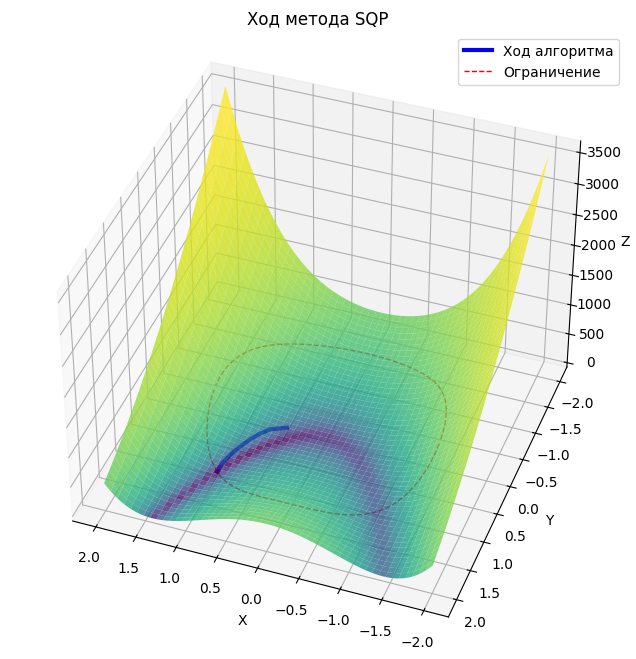

In [14]:

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={"projection": "3d"})

ax.plot_surface(X, Y, Z, cmap='viridis', norm="log", alpha=0.8)
ax.plot(x_log, y_log, f_log, color="blue", lw=3, alpha=1, label="Ход алгоритма")

ax.plot(x_g, y_g_1, z_g_1, color="red", ls="--", lw=1, alpha=1, label="Ограничение")
ax.plot(x_g, y_g_2, z_g_2, color="red", ls="--", lw=1, alpha=1)
ax.view_init(elev=40, azim=110)
    
plt.title('Ход метода SQP')
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()